### Überblick: Herkunfts- und Aufnahmeländer von Geflüchteten

Dieses Notebook zeigt eine einfache Auswertung der Daten zu Herkunfts- und
Aufnahmeländern von Geflüchteten. Es wird dargestellt, welche Länder
besonders viele Geflüchtete hervorbringen oder aufnehmen – sowohl in
absoluten Zahlen als auch im Verhältnis zur Bevölkerung.

Die Ergebnisse geben einen Überblick und dienen als Vorbereitung für die
spätere Analyse zum Zusammenhang zwischen Wohlstand und
Flüchtlingsaufnahme.


Der Datensatz wird geladen und das Herkunftsland bestimmt.
Anschließend wird für jedes Land die Gesamtzahl der Geflüchteten über alle
Jahre berechnet.

Die fünf Länder mit den höchsten absoluten Zahlen werden in einem
Balkendiagramm dargestellt.


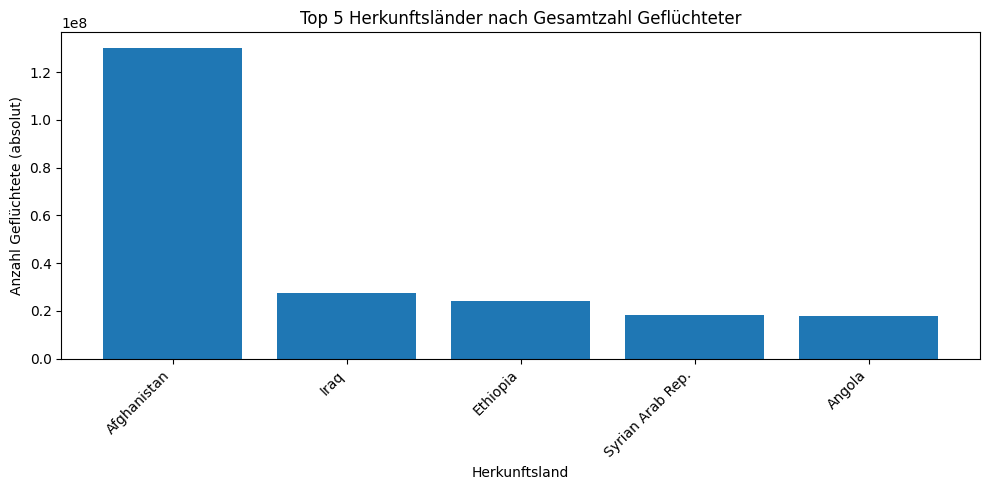

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Datensatz einmal laden
path_origin = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Origin_refugees_per_capita.csv"
df_origin = pd.read_csv(path_origin)

country_col = "country"

origin_totals = (
    df_origin
    .groupby(country_col)["Refugee_amount"]
    .sum()
    .sort_values(ascending=False)
)

top_origins = origin_totals.head(5)

plt.figure(figsize=(10, 5))
plt.bar(top_origins.index, top_origins.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Anzahl Geflüchtete (absolut)")
plt.xlabel("Herkunftsland")
plt.title("Top 5 Herkunftsländer nach Gesamtzahl Geflüchteter")
plt.tight_layout()
plt.show()



Für jedes Herkunftsland wird der durchschnittliche Anteil an Geflüchteten
relativ zur Bevölkerung berechnet. Die fünf Länder mit den höchsten
Durchschnittswerten werden ausgewählt.

Die Verteilung dieser Anteile über die Jahre wird mithilfe von Boxplots
dargestellt, um Unterschiede und Streuungen sichtbar zu machen.







C:\Users\paulk\AppData\Local\Temp\ipykernel_90312\684689961.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


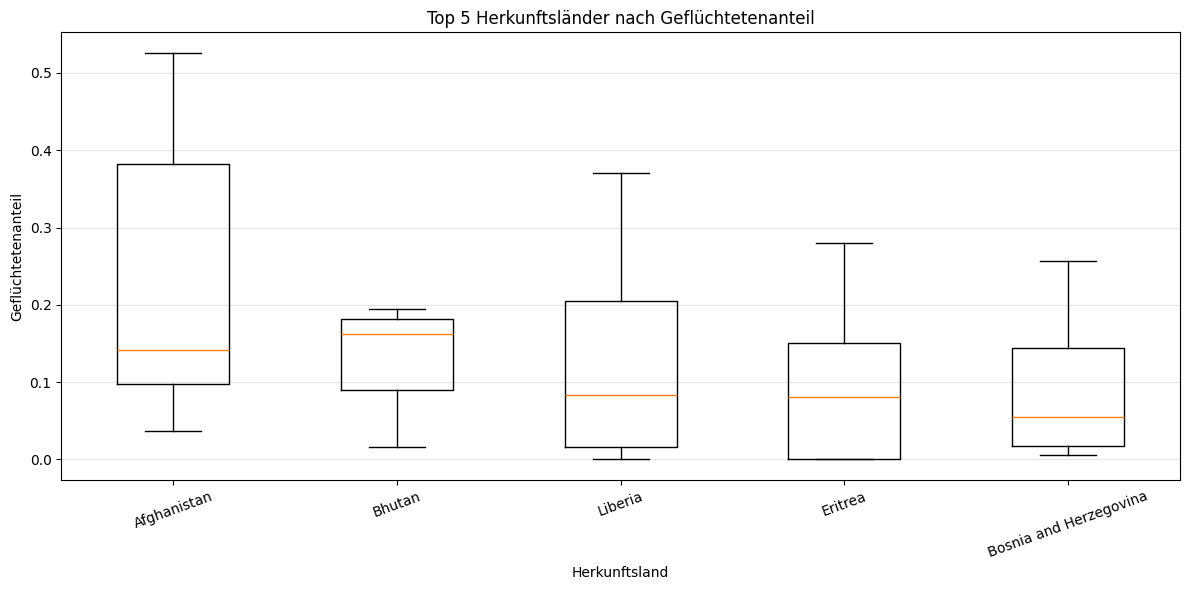

In [2]:
share_col = "refugee_share"

avg_share_origin = (
    df_origin
    .groupby(country_col)[share_col]
    .mean()
    .sort_values(ascending=False)
)

top5_origin = avg_share_origin.head(5).index
df_top5_origin = df_origin[df_origin[country_col].isin(top5_origin)]

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df_top5_origin[df_top5_origin[country_col] == c][share_col] for c in top5_origin],
    labels=top5_origin
)

plt.title("Top 5 Herkunftsländer nach Geflüchtetenanteil")
plt.xlabel("Herkunftsland")
plt.ylabel("Geflüchtetenanteil")
plt.xticks(rotation=20)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Der Datensatz zu Aufnahmeländern wird geladen und für jedes Land die
Gesamtzahl der aufgenommenen Geflüchteten über alle Jahre berechnet.

Die fünf Länder mit den höchsten absoluten Aufnahmezahlen werden in einem
Balkendiagramm dargestellt.

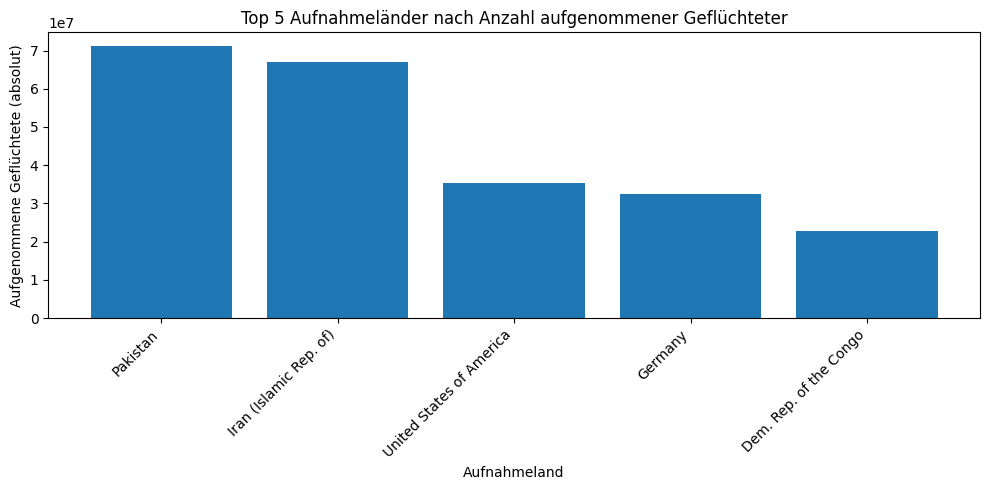

In [3]:
# Datensatz einmal laden
path_dest = r"C:/Users/paulk/My_Drive/Statistik/Statistik_Projekt/output_csv_files/Destination_refugees_per_capita.csv"
df_dest = pd.read_csv(path_dest)

dest_totals = (
    df_dest
    .groupby("country")["Refugee_amount"]
    .sum()
    .sort_values(ascending=False)
)

top5_dest_abs = dest_totals.head(5)

plt.figure(figsize=(10, 5))
plt.bar(top5_dest_abs.index, top5_dest_abs.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Aufgenommene Geflüchtete (absolut)")
plt.xlabel("Aufnahmeland")
plt.title("Top 5 Aufnahmeländer nach Anzahl aufgenommener Geflüchteter")
plt.tight_layout()
plt.show()




Für jedes Aufnahmeland wird der durchschnittliche Geflüchtetenanteil
relativ zur Bevölkerung berechnet. Die fünf Länder mit den höchsten
Durchschnittswerten werden ausgewählt.

Die zeitliche Verteilung dieser Anteile wird mithilfe von Boxplots
visualisiert.








C:\Users\paulk\AppData\Local\Temp\ipykernel_90312\567190009.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


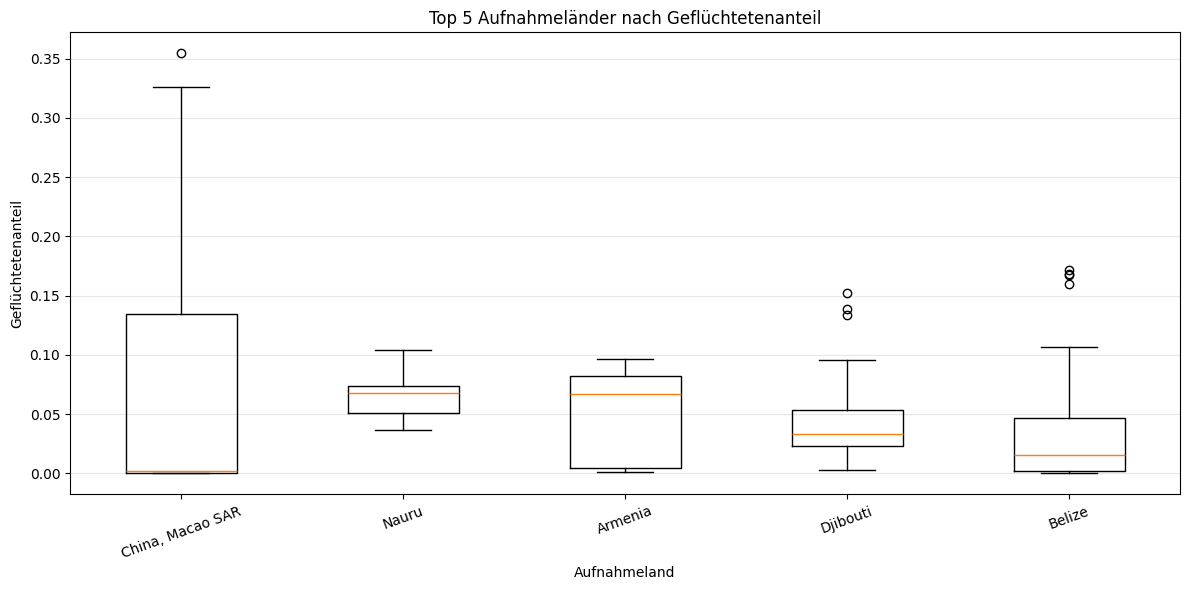

In [4]:
avg_share_dest = (
    df_dest
    .groupby("country")["refugee_share"]
    .mean()
    .sort_values(ascending=False)
)

top5_dest_rel = avg_share_dest.head(5).index
df_top5_dest = df_dest[df_dest["country"].isin(top5_dest_rel)]

plt.figure(figsize=(12, 6))
plt.boxplot(
    [df_top5_dest[df_top5_dest["country"] == c]["refugee_share"] for c in top5_dest_rel],
    labels=top5_dest_rel
)

plt.title("Top 5 Aufnahmeländer nach Geflüchtetenanteil")
plt.xlabel("Aufnahmeland")
plt.ylabel("Geflüchtetenanteil")
plt.xticks(rotation=20)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()
